In [1]:
from tensorflow.keras.models import load_model
from kapre.time_frequency import STFT, Magnitude, ApplyFilterbank, MagnitudeToDecibel
from sklearn.preprocessing import LabelEncoder
import numpy as np
from glob import glob
import argparse
import os
import pandas as pd
from tqdm import tqdm
from pydub import AudioSegment
import wavio
from pandas import DataFrame
from datetime import datetime
import time
import glob
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
# Currently, memory growth needs to be the same across GPUs
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])

In [2]:
classes=[
    'Alikom_Alsalam',
    'Alla_Ysalmk',
    'Ay_Khedma_Thanya',
    'Fe_Aman_Allah',
    'Hadhreen',
    'Hala_Shaikh',
    'Hayak_Allah',
    'Hayyak',
    'Maa_Alsalama',
    'Marhaba',
    'Noise',
    'Tamer_Ala_she_Thani',
    'Tfadhel']

Speech_model = load_model("D:/VMS/Audio-Classification-master/Audio_Train/Best_Audio3.h5",
    custom_objects={'STFT':STFT,
                    'Magnitude':Magnitude,
                    'ApplyFilterbank':ApplyFilterbank,
                    'MagnitudeToDecibel':MagnitudeToDecibel})

# "d:/VMS/Audio-Classification-master/Audio-Classification-master - Model changing 2/models/conv2d.h5"
# D:/VMS/Audio-Classification-master/Audio_Train/Best_Audio3.h5

In [3]:
def make_prediction(W_path):

    obj = wavio.read(W_path)
    wav = obj.data.astype(np.float32, order='F')
    if wav.shape[0] !=  160000 :
        shape = wav.shape
        N_pad = 160000 - shape[0]
        shape = (N_pad,) + shape[1:]
        wav=np.vstack((np.zeros(shape),wav))


    wav = wav.reshape(1,160000, 1)
    X_batch = np.array(wav, dtype=np.float32)
    y_pred = Speech_model.predict(X_batch)
    y_mean = np.mean(y_pred, axis=0)
    y_pred = np.argmax(y_mean)
    return classes[y_pred],y_mean,y_pred

In [4]:
mapping=[
    'Welcoming_h',
    'Closure_h',
    'Anything Else_h',
    'Closure_h',
    'Courtesy_Word_h',
    'Courtesy_Word_h',
    'Closure_h',
    'Welcoming_h',
    'Closure_h',
    'Welcoming_h',
    'Noise_h',
    'Anything Else_h',
    'Welcoming_h']

In [5]:
output_path="D:/VMS/del/RAW/"

In [6]:
test,x,n=make_prediction("d:/VMS/Audio-Classification-master/Audio-Classification-master - Model changing 2/untitled.wav")

In [7]:
test

'Alikom_Alsalam'

In [8]:
def Prediction_Audio(path):

# the path where all images will be preprocessed 
    all_files = glob.glob(output_path+"/"+path+'/'+path+"_Sound/")
    Frames_list=os.listdir(all_files[0])
    Frames_list = sorted(Frames_list, key = lambda x: int(x.split("_")[-1].split(".")[0]))
    #print(len(all_files))
    for filename in Frames_list:
        x1,y1,z1 = make_prediction(all_files[0]+filename)
        Category.append(mapping[z1])
        Sub_Category.append(x1)
        chunk_name.append(filename)


    return 

In [9]:
Category = []
Sub_Category=[]
Ser=[]
chunk_name=[]

start_time = datetime.now()
mp4_Frames_Path=os.listdir(output_path)
print ("Total of Dir =" + str(len(mp4_Frames_Path)) )
counter=1
for frmspath in mp4_Frames_Path:  #loop Dir to send to function!
    print(frmspath)
    Folder_name=os.path.splitext(frmspath)[0]
    Prediction_Audio(frmspath)
    counter = counter +1


end_time = datetime.now()
print('\n Duration: {}'.format(end_time - start_time))

Total of Dir =60
P06681_06_06_2019_081946_wc
P06682_17_06_2019_024317_wc
P06682_21_06_2019_064900_wc
P08446_18_06_2019_213500_wc
P08446_27_06_2019_151031_wc
P08446_29_06_2019_205931_wc
P08446_30_06_2019_213152_wc
P08449_27_06_2019_195811_wc
P08449_29_06_2019_184520_wc
P08453_15_06_2019_184841_wc
P08453_25_06_2019_122023_wc
P08454_30_06_2019_175354_wc
P08455_23_06_2019_121023_wc
P08455_23_06_2019_214522_wc
P08528_26_06_2019_170623_wc
P08537_25_06_2019_172211_wc
P08539_12_06_2019_144845_wc
P08539_30_06_2019_171041_wc
P08655_05_07_2019_224316_wc
P08655_06_07_2019_184931_wc
P08655_27_06_2019_115537_wc
P08655_28_06_2019_144759_wc
P08656_05_07_2019_221229_wc
P08656_06_07_2019_172535_wc
P08656_23_06_2019_183212_wc
P08658_06_07_2019_154932_wc
P08658_07_07_2019_103227_wc
P08658_07_07_2019_110933_wc
P08658_07_07_2019_111219_wc
P08658_07_07_2019_114552_wc
P08658_30_06_2019_135027_wc
P08659_05_07_2019_192614_wc
P08659_05_07_2019_194017_wc
P08659_06_07_2019_113037_wc
P08659_06_07_2019_140601_wc
P08

In [10]:
results_list=[]
for a,b,c in zip(Category,Sub_Category,chunk_name): 
    results_list.append([a,b,c])

In [ ]:
results_list

In [12]:
results_df = pd.DataFrame(results_list, columns = ['Category','Sub_Category','Interveiw_Name'])

In [ ]:
results_df=results_df[results_df["Category"] != 'Noise']
results_df

In [14]:
results_df['name']=results_df['Interveiw_Name'].str.split('_',n=6).str[0:5].str.join('_')

In [15]:
results_df=results_df[['Category','name']].groupby(['name','Category'])['Category'].size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['name','Category'])

In [16]:
results_df=results_df.pivot(index="name", columns="Category", values="count").fillna(0)

In [ ]:
results_df

In [18]:
results_df[results_df>0]=1

In [19]:
results_df=results_df.astype("int")

In [ ]:
Y_hat=results_df[['Welcoming_h','Courtesy_Word_h','Closure_h','Anything Else_h']]
Y_hat

In [21]:
#now to read Actual evaluation

In [ ]:
Y = pd.read_excel(y_Source,"Y").astype("category")
Y

In [25]:
Y=Y.set_index('name')

In [ ]:
Y_Audio=Y[['Welcoming','Courtesy_Word','Closure','Anything Else']]
Y_Audio

In [27]:
Y_hat=Y_Audio.join(Y_hat)

In [28]:
Y_hat_all=Y_hat.astype("category")

In [31]:
unique_labels=[
    'Welcoming_h',
    'Closure_h',
    'Anything Else_h',
    'Courtesy_Word_h']

In [32]:
Y_Audio=Y_hat_all[['Welcoming','Courtesy_Word','Closure','Anything Else']]
Y_h_Audio=Y_hat_all[['Welcoming_h','Courtesy_Word_h','Closure_h','Anything Else_h']]

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, plot_confusion_matrix

In [ ]:
confusion_matrix1 = pd.crosstab(Y_Audio['Welcoming'], Y_h_Audio['Welcoming_h'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix1)

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

<Figure size 576x432 with 0 Axes>

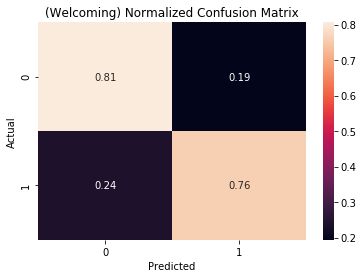

<Figure size 576x432 with 0 Axes>

In [36]:
conf_mat1 = confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis] #Normalisation Happens here
plt.title('(Welcoming) Normalized Confusion Matrix')

sn.heatmap(conf_mat1, annot=True)
plt.figure(figsize = (8,6))

In [ ]:
confusion_matrix2 = pd.crosstab(Y_Audio['Courtesy_Word'], Y_h_Audio['Closure_h'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix2)

<Figure size 576x432 with 0 Axes>

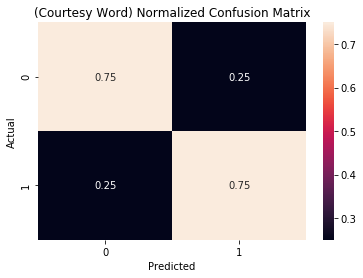

<Figure size 576x432 with 0 Axes>

In [38]:
conf_mat2 = confusion_matrix2.astype('float') / confusion_matrix2.sum(axis=1)[:, np.newaxis] #Normalisation Happens here
plt.title('(Courtesy Word) Normalized Confusion Matrix')

sn.heatmap(conf_mat2, annot=True)
plt.figure(figsize = (8,6))

In [ ]:
confusion_matrix3 = pd.crosstab(Y_Audio['Closure'], Y_h_Audio['Closure_h'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix3)

<Figure size 576x432 with 0 Axes>

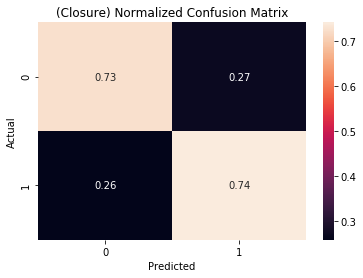

<Figure size 576x432 with 0 Axes>

In [44]:
conf_mat3 = confusion_matrix3.astype('float') / confusion_matrix3.sum(axis=1)[:, np.newaxis] #Normalisation Happens here
plt.title('(Closure) Normalized Confusion Matrix')

sn.heatmap(conf_mat3, annot=True)
plt.figure(figsize = (8,6))

In [ ]:
confusion_matrix4 = pd.crosstab(Y_Audio['Anything Else'], Y_h_Audio['Anything Else_h'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix4)

<Figure size 576x432 with 0 Axes>

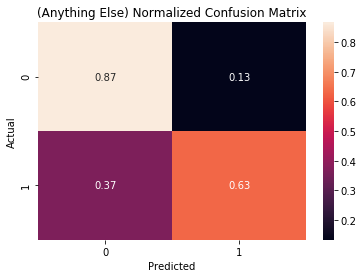

<Figure size 576x432 with 0 Axes>

In [46]:
conf_mat4 = confusion_matrix4.astype('float') / confusion_matrix4.sum(axis=1)[:, np.newaxis] #Normalisation Happens here
plt.title('(Anything Else) Normalized Confusion Matrix')

sn.heatmap(conf_mat4, annot=True)
plt.figure(figsize = (8,6))